In [126]:
# Importing all the necessary library

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [127]:
# Loading our training data as train_df and testing data as test_df

train =pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [128]:
# checking for null values in training dataset

train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [129]:
# checking null values in testing dataset

test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [130]:
# filling the null values with median 

imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median" )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train["HomePlanet"].fillna('Z', inplace=True)
test["HomePlanet"].fillna('Z', inplace=True)

In [131]:
# label encoding 

label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train_df,test_df,columns):
    for col in columns:
        train_df[col] = train_df[col].astype(str)
        test_df[col] = test_df[col].astype(str)
        train_df[col] = LabelEncoder().fit_transform(train[col])
        test_df[col] =  LabelEncoder().fit_transform(test[col])
    return train_df, test_df

train ,test = label_encoder(train,test,label_cols)

In [132]:
cor = train.corr()
cor

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.068726,-0.425569,0.042618,0.122943,0.044255,0.192189,0.056321,0.088970,0.045252,0.035631,0.107755
CryoSleep,0.068726,1.000000,0.100689,-0.085571,-0.068816,-0.023407,-0.216689,-0.182029,-0.188532,-0.178382,-0.171721,0.404716
Cabin,-0.425569,0.100689,1.000000,0.113260,-0.236994,-0.053158,-0.073802,-0.260056,-0.067709,-0.180768,-0.210865,-0.052604
Destination,0.042618,-0.085571,0.113260,1.000000,-0.004342,-0.024905,0.043735,-0.109558,0.022982,-0.052915,-0.072850,-0.104817
Age,0.122943,-0.068816,-0.236994,-0.004342,1.000000,0.032434,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233
VIP,0.044255,-0.023407,-0.053158,-0.024905,0.032434,1.000000,0.038011,0.054756,-0.009496,0.020355,0.054623,-0.014260
RoomService,0.192189,-0.216689,-0.073802,0.043735,0.068629,0.038011,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,0.056321,-0.182029,-0.260056,-0.109558,0.127390,0.054756,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.088970,-0.188532,-0.067709,0.022982,0.033148,-0.009496,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,0.045252,-0.178382,-0.180768,-0.052915,0.120946,0.020355,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545


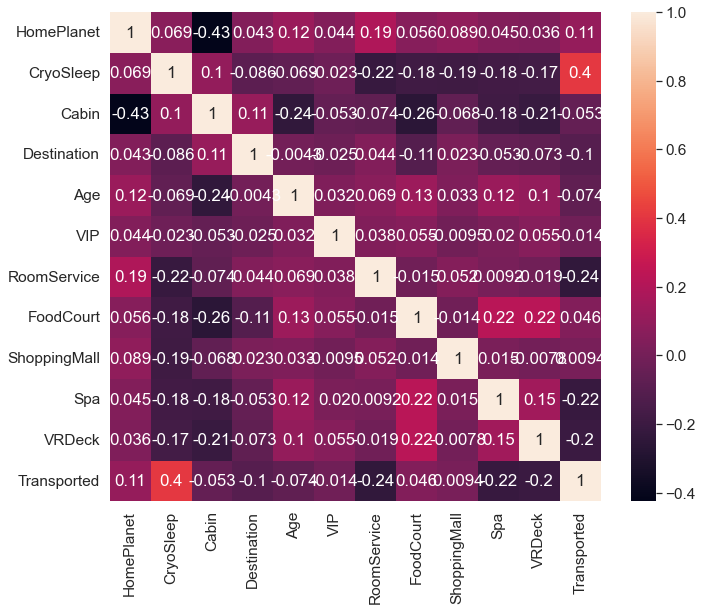

In [133]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(train.corr(), annot=True)
plt.show()

In [134]:
# Droping the Transported column from X_train because its the label we are trying to predict
# Droping the Name column for X_train because its doest affect the outcome
# Droping the Namr column for X_test

X_train = train.drop(["Transported","Name"], axis =1 )
y_train = train["Transported"]
X_test = test.drop("Name",axis=1)

In [135]:
# Checking the datatypes of the Training dataset

X_train.dtypes

PassengerId      object
HomePlanet        int32
CryoSleep         int32
Cabin             int32
Destination       int32
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [136]:
y_train.dtypes

dtype('bool')

In [137]:
# Checking the datatypes of the Testing dataset

X_test.dtypes

PassengerId      object
HomePlanet        int32
CryoSleep         int32
Cabin             int32
Destination       int32
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [138]:
le = LabelEncoder()
X_train["PassengerId"] = le.fit_transform(X_train["PassengerId"])
X_test["PassengerId"]= le.fit_transform(X_test["PassengerId"])

In [139]:
X_train.dtypes

PassengerId       int32
HomePlanet        int32
CryoSleep         int32
Cabin             int32
Destination       int32
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [141]:
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

<AxesSubplot:title={'center':'VIP'}>

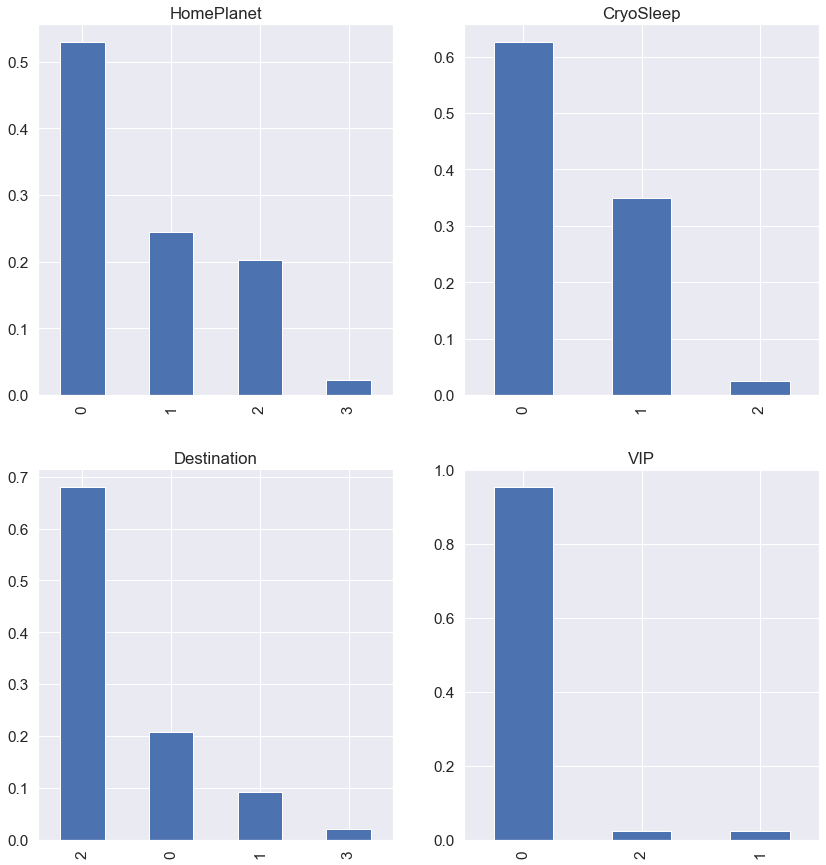

In [143]:
# Visualize independent categorical features
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
X_train['HomePlanet'].value_counts(normalize = True).plot.bar(title = 'HomePlanet')
plt.subplot(222)
X_train['CryoSleep'].value_counts(normalize = True).plot.bar(title = 'CryoSleep')
plt.subplot(223)
X_train['Destination'].value_counts(normalize = True).plot.bar(title = 'Destination')
plt.subplot(224)
X_train['VIP'].value_counts(normalize = True).plot.bar(title = 'VIP')

# Building the Random Forest Model

In [146]:
# Building our Random Forest Model

clf = RandomForestClassifier(max_depth=10, random_state=42)
# max_depth: The number of splits that each decision tree is allowed to make

In [147]:
# Fitting the Model with training data

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

# Prediction on Testing dataset

In [148]:
# Predicting the Test set results

y_pred = clf.predict(X_test)

In [149]:
y_pred

array([ True, False,  True, ...,  True,  True,  True])

# Submission:

In [150]:
# Since Passenger Id was transformed we need to inverse transform it for submission

X_test["PassengerId"]= le.inverse_transform(X_test["PassengerId"])

In [151]:
# Checking the datatype of the testing dataset

X_test.dtypes

PassengerId      object
HomePlanet        int32
CryoSleep         int32
Cabin             int32
Destination       int32
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [152]:
# Creating a new dataframe for submission which will have PassengerId and Transported Column

submission = pd.DataFrame(
    {'PassengerId':X_test["PassengerId"] ,
     'Transported': y_pred},columns=['PassengerId', 'Transported'])

In [153]:
# Saving our Submisson File

submission.to_csv("submission.csv",index=False)

In [154]:
# Checking the dimension of our submission Compitetion requires submission file shape to be(4277,2)

submission.shape

(4277, 2)

In [155]:
X = train.drop(columns = ['Transported', 'Name'])
y = train[['PassengerId', 'Transported']]

In [156]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,9278_01,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,9279_01,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,9280_01,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [157]:
y

,PassengerId,Transported
0,0001_01,False
1,0002_01,True
2,0003_01,False
3,0003_02,False
4,0004_01,True
...,...,...
8688,9276_01,False
8689,9278_01,False
8690,9279_01,True
8691,9280_01,False


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [159]:
y_pred = clf.predict(X_test)

In [160]:
y_test

,PassengerId,Transported
3601,3868_05,True
6057,6405_02,True
2797,3021_01,False
7110,7578_01,False
8579,9158_01,True
...,...,...
7081,7536_01,True
2873,3104_01,True
3420,3688_01,True
535,0569_01,True


In [161]:
y_pred

array([False,  True, False, ...,  True,  True, False])

In [162]:
y = y_test.iloc[:,-1]
y

3601     True
6057     True
2797    False
7110    False
8579     True
        ...  
7081     True
2873     True
3420     True
535      True
5117    False
Name: Transported, Length: 2608, dtype: bool

In [163]:
type(y)

pandas.core.series.Series

In [164]:
type(y_pred)

numpy.ndarray

In [165]:
import numpy as np
np.array(y)

array([ True,  True, False, ...,  True,  True, False])

In [166]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [167]:
le = preprocessing.LabelEncoder()
le.fit(y_pred)
y_pred = le.transform(y_pred)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [168]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1303
           1       0.81      0.88      0.84      1305

    accuracy                           0.84      2608
   macro avg       0.84      0.84      0.84      2608
weighted avg       0.84      0.84      0.84      2608



In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"The model's accuracy score is {round(accuracy_score(y, y_pred)*100, 2)}%")

The model's accuracy score is 83.55%


In [170]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[1027  276]
 [ 153 1152]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

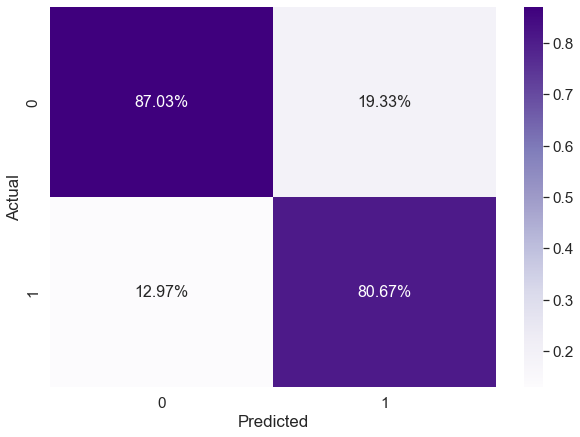

In [171]:
data = confusion_matrix(y, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y), index = np.unique(y_pred))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm/np.sum(df_cm), cmap="Purples", annot=True,annot_kws={"size": 16}, fmt = '.2%')